<a href="https://colab.research.google.com/github/DanchengLiu/device_classify/blob/main/EDA_lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
'''
!wget --recursive --no-parent -R "index.html*" https://research.engr.oregonstate.edu/hamdaoui/RFFP-dataset/Diff_Days_Indoor_Setup/Day1/Device1/
!wget --recursive --no-parent -R "index.html*" https://research.engr.oregonstate.edu/hamdaoui/RFFP-dataset/Diff_Days_Indoor_Setup/Day1/Device2/
!wget --recursive --no-parent -R "index.html*" https://research.engr.oregonstate.edu/hamdaoui/RFFP-dataset/Diff_Days_Indoor_Setup/Day2/Device1/
!wget --recursive --no-parent -R "index.html*" https://research.engr.oregonstate.edu/hamdaoui/RFFP-dataset/Diff_Days_Indoor_Setup/Day2/Device2/
'''
for i in range(0,5):
  for j in range(0,25):
    cmd = 'wget --recursive --no-parent -R "index.html*" https://research.engr.oregonstate.edu/hamdaoui/RFFP-dataset/Diff_Days_Indoor_Setup/Day'+str(i+1)+'/Device'+str(j+1)+'/IQ_1.dat'
    os.system(cmd)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp -r /content/research.engr.oregonstate.edu /content/drive/MyDrive/

In [2]:
import struct
import numpy as np

bytes

In [5]:
name = ["1"]
Xd_day1_device1 = bytes()
Xd_day1_device2 = bytes()
Xd_day2_device1 = bytes()
Xd_day2_device2 = bytes()
for i in range(1):
  Xf = open("/content/research.engr.oregonstate.edu/hamdaoui/RFFP-dataset/Diff_Days_Indoor_Setup/Day1/Device1/IQ_"+name[i]+".dat",'rb')
  Xd_day1_device1 = Xd_day1_device1+Xf.read()
  Xf.close()
for i in range(1):
  Xf = open("/content/research.engr.oregonstate.edu/hamdaoui/RFFP-dataset/Diff_Days_Indoor_Setup/Day1/Device2/IQ_"+name[i]+".dat",'rb')
  Xd_day1_device2 = Xd_day1_device2+Xf.read()
  Xf.close()

### some basic eda

In [6]:
data = []

In [7]:
data = []
for i in range(len(Xd_day1_device1)//4):
  data.append(struct.unpack('f',Xd_day1_device1[i*4:i*4+4]))

In [8]:
data = np.array(data)

In [9]:
real = data[1:len(data)-1:2]
imag = data[2:len(data):2]

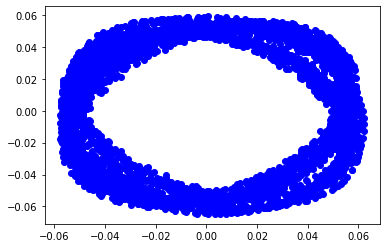

In [10]:
import matplotlib.pyplot as plt
plt.plot(real[:5000], imag[:5000], 'bo')

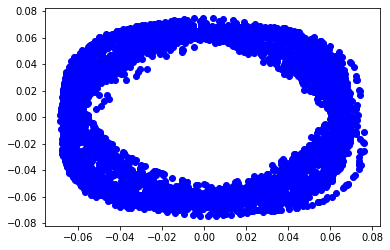

In [11]:
data = []
for i in range(len(Xd_day1_device2)//4):
  data.append(struct.unpack('f',Xd_day1_device2[i*4:i*4+4]))
data = np.array(data)
real = data[1:len(data)-1:2]
imag = data[2:len(data):2]
plt.plot(real[:5000], imag[:5000], 'bo')

### a basic NN

In [56]:
X_train = np.zeros((2, len(Xd_day1_device1)//4//2*2))
data = []
for i in range(len(Xd_day1_device1)//4):
  data.append(struct.unpack('f',Xd_day1_device1[i*4:i*4+4]))
real = np.array(data[0:len(data)-1:2])
imag = np.array(data[1:len(data):2])
print(real.shape)
X_train[0,0:len(data)//2] = real[:,0]
X_train[1,0:len(data)//2] = imag[:,0]

data = []
for i in range(len(Xd_day1_device2)//4):
  data.append(struct.unpack('f',Xd_day1_device2[i*4:i*4+4]))
real = np.array(data[0:len(data)-1:2])
imag = np.array(data[1:len(data):2])
X_train[0,len(data)//2:] = real[:,0]
X_train[1,len(data)//2:] = imag[:,0]

(20000000, 1)


In [57]:
X_train[0:10]

array([[ 0.04211553,  0.0334788 ,  0.02172917, ..., -0.04837183,
        -0.0415662 , -0.03344828],
       [ 0.0252388 ,  0.03707998,  0.04641864, ..., -0.02362132,
        -0.03244117, -0.03988768]])

In [58]:
X_train_r = np.reshape(X_train, (2,len(X_train[0])//8000,8000)).transpose((1,0,2))

In [59]:
X_train_r.shape

(5000, 2, 8000)

In [60]:
Y = [1 for i in range(2500)]+[2 for i in range(2500)]

(8000,)
1
2


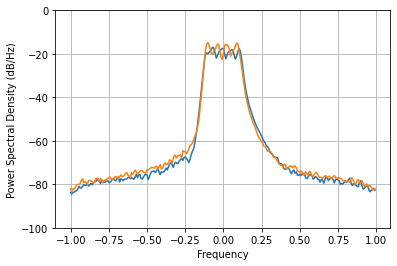

In [61]:
plt.ylim([-100, 0])

X = X_train_r[0][0]+1j*X_train_r[0][1]
print(X.shape)
plt.psd(X)
print(Y[0])

X = X_train_r[2500][0]+1j*X_train_r[2500][1]
plt.psd(X)
print(Y[2500])
plt.show()

data split

In [3]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)])
    yy1[np.arange(len(yy)),yy-1] = 1
    return yy1

In [63]:
Y = np.array(Y)
Y.shape

(5000,)

In [66]:
n_examples = 5000
n_train = 4000
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))

# normalize
for i in range(len(X_train_r)):
  X_train_r[i] = X_train_r[i]/np.linalg.norm(X_train_r[i])

X_train = X_train_r[train_idx]
X_test =  X_train_r[test_idx]
Y_train = to_onehot(Y[train_idx])
Y_test =  to_onehot(Y[test_idx])

In [67]:
X_train.shape

(4000, 2, 8000)

(8000,)
[1. 0.]
[0. 1.]


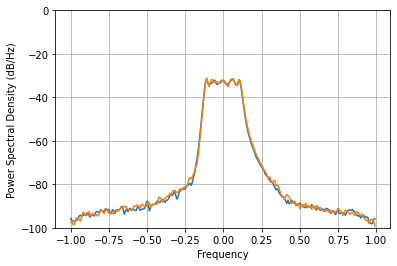

In [70]:
plt.ylim([-100, 0])

X = X_train[0][0]+1j*X_train[0][1]
print(X.shape)
plt.psd(X)
print(Y_train[0])

X = X_train[2][0]+1j*X_train[2][1]
plt.psd(X)
print(Y_train[2])
plt.show()

NN

In [4]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow_addons as tfa

In [6]:
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import AveragePooling2D
from keras.regularizers import *
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as cPickle, random
import sys, keras

In [12]:
import os
from keras.layers import CuDNNLSTM
from keras.models import Model
from keras.layers import Input,Dense,Conv1D,Dropout,concatenate,Reshape, AveragePooling1D, AveragePooling2D, LeakyReLU, Flatten, BatchNormalization, MaxPooling2D, MaxPooling1D
from keras.layers.convolutional import Conv2D, SeparableConv2D, DepthwiseConv2D, DepthwiseConv1D

def CNN(weights=None,
             input_shape=[2,8000],
             classes=2,
             **kwargs):
    if weights is not None and not (os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), '
                         'or the path to the weights file to be loaded.')

    dr=0.5

    #input1=Input(input_shape+[1],name='To3D')

    input0=Input(input_shape+[1],name='Combined')
    


    # Part-A: Multi-channel Inputs and Spatial Characteristics Mapping Section
    x=Conv2D(16,(1,4),padding='same',name="Conv1",kernel_initializer="glorot_uniform")(input0)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)
    x=MaxPooling2D(pool_size = (1,2), strides=(1,2))(x)

    x=Conv2D(24,(1,4),padding='same',name="Conv2",kernel_initializer="glorot_uniform")(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)
    x=MaxPooling2D(pool_size = (1,2), strides=(1,2))(x)

    x=Conv2D(32,(1,4),padding='same',name="Conv3",kernel_initializer="glorot_uniform")(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)
    x=MaxPooling2D(pool_size = (1,2), strides=(1,2))(x)

    x=Conv2D(48,(1,4),padding='same',name="Conv4",kernel_initializer="glorot_uniform")(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)
    x=MaxPooling2D(pool_size = (1,2), strides=(1,2))(x)

    x=Conv2D(64,(1,4),padding='same',name="Conv5",kernel_initializer="glorot_uniform")(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)
    x=MaxPooling2D(pool_size = (1,2), strides=(1,2))(x)

    x=Conv2D(96,(2,4),padding='same',name="Conv6",kernel_initializer="glorot_uniform")(x)
    x=BatchNormalization()(x)
    x=LeakyReLU()(x)
    x=AveragePooling2D(pool_size = (1,250))(x)

    #DNN
    x=Flatten()(x)
    x=Dense(25,name="FC1")(x)
    x=LeakyReLU()(x)
    x=Dropout(dr)(x)

    
    x=Dense(classes,activation="softmax",name="Softmax")(x)

    model=Model(inputs=input0,outputs=x)

    # Load weights.
    if weights is not None:
        model.load_weights(weights)
    
    return model

In [8]:
model = CNN()
model.compile(loss='categorical_crossentropy', optimizer=tfa.optimizers.SGDW(weight_decay = 0.0001, learning_rate=0.07))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Combined (InputLayer)       [(None, 2, 8000, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 2, 8000, 16)       80        
                                                                 
 batch_normalization (BatchN  (None, 2, 8000, 16)      64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2, 8000, 16)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 4000, 16)      0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 1, 4000, 24)       1560  

In [9]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [77]:
batch_size=100
nb_epoch=100
filepath = 'CNN.h5'
with tf.device('/device:GPU:0'):
    history = model.fit(X_train,
        Y_train,
        batch_size=batch_size,
        epochs=nb_epoch,
        verbose=2,
        validation_data=(X_test, Y_test),
        callbacks = [
            keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')
        ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
40/40 - 79s - loss: 0.7030 - val_loss: 0.6916 - 79s/epoch - 2s/step
Epoch 2/100
40/40 - 69s - loss: 0.6929 - val_loss: 0.6933 - 69s/epoch - 2s/step
Epoch 3/100
40/40 - 72s - loss: 0.6849 - val_loss: 0.6933 - 72s/epoch - 2s/step
Epoch 4/100
40/40 - 74s - loss: 0.6811 - val_loss: 0.7032 - 74s/epoch - 2s/step
Epoch 5/100


KeyboardInterrupt: ignored

### full 25 classes

In [1]:
import struct
import numpy as np
import tensorflow_addons as tfa
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import AveragePooling2D
from keras.regularizers import *
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as cPickle, random
import sys, keras

In [2]:
temp = bytes()
data = []
for i in range(0,25):
  Xf = open("/content/research.engr.oregonstate.edu/hamdaoui/RFFP-dataset/Diff_Days_Indoor_Setup/Day1/Device"+str(i+1)+"/IQ_1.dat",'rb')
  temp = Xf.read()
  # use only 1/10 data for now
  for j in range(len(temp)//4//10):
    data.append(struct.unpack('f',temp[j*4:j*4+4]))
  temp = bytes()
  Xf.close()



data = np.array(data)
print(data.shape)

(100000000, 1)


In [6]:
X = np.zeros((2, len(data)//2))

X[0,0:len(data)//2] = data[0:len(data)-1:2,0]
X[1,0:len(data)//2] = data[1:len(data):2,0]

X_reshape = np.reshape(X, (2,len(X[0])//8000,8000)).transpose((1,0,2))
print(X_reshape.shape)

(6250, 2, 8000)


In [8]:
Y = []
for i in range(0,25):
  for _ in range(250):
    Y.append(i+1)
Y = np.array(Y)
print(Y.shape)

(6250,)


In [9]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)])
    yy1[np.arange(len(yy)),yy-1] = 1
    return yy1

In [11]:
n_examples = 6250
n_train = int(0.8*6250)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))

# normalize
for i in range(len(X_reshape)):
  X_reshape[i] = X_reshape[i]/np.linalg.norm(X_reshape[i])

X_train = X_reshape[train_idx]
X_test =  X_reshape[test_idx]
Y_train = to_onehot(Y[train_idx])
Y_test =  to_onehot(Y[test_idx])

In [14]:
# make sure that it's shuffled
train_idx

array([ 772, 1416, 2803, ..., 2540,  148, 2952])

In [13]:
model = CNN(classes=25)
model.compile(loss='categorical_crossentropy', optimizer=tfa.optimizers.SGDW(weight_decay = 0.0001, learning_rate=0.07))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Combined (InputLayer)       [(None, 2, 8000, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 2, 8000, 16)       80        
                                                                 
 batch_normalization (BatchN  (None, 2, 8000, 16)      64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2, 8000, 16)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 4000, 16)      0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 1, 4000, 24)       1560  

In [15]:
batch_size=100
nb_epoch=100
filepath = 'CNN.h5'
with tf.device('/device:GPU:0'):
    history = model.fit(X_train,
        Y_train,
        batch_size=batch_size,
        epochs=nb_epoch,
        verbose=2,
        validation_data=(X_test, Y_test),
        callbacks = [
            keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')
        ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

Epoch 1/100
50/50 - 73s - loss: 3.2540 - val_loss: 3.2263 - 73s/epoch - 1s/step
Epoch 2/100
50/50 - 69s - loss: 3.2196 - val_loss: 3.2499 - 69s/epoch - 1s/step
Epoch 3/100
50/50 - 67s - loss: 3.2164 - val_loss: 3.2715 - 67s/epoch - 1s/step
Epoch 4/100
50/50 - 73s - loss: 3.2120 - val_loss: 3.3184 - 73s/epoch - 1s/step
Epoch 5/100
50/50 - 70s - loss: 3.2087 - val_loss: 3.3715 - 70s/epoch - 1s/step
Epoch 6/100
50/50 - 67s - loss: 3.2049 - val_loss: 3.4010 - 67s/epoch - 1s/step
Epoch 7/100
50/50 - 68s - loss: 3.1980 - val_loss: 3.3787 - 68s/epoch - 1s/step
Epoch 8/100
50/50 - 66s - loss: 3.1886 - val_loss: 3.5776 - 66s/epoch - 1s/step
Epoch 9/100
50/50 - 77s - loss: 3.1763 - val_loss: 10.7981 - 77s/epoch - 2s/step
Epoch 10/100
50/50 - 65s - loss: 3.1601 - val_loss: 15.7209 - 65s/epoch - 1s/step
Epoch 11/100
50/50 - 66s - loss: 3.1518 - val_loss: 25.7070 - 66s/epoch - 1s/step
Epoch 12/100
50/50 - 67s - loss: 3.1350 - val_loss: 19.1792 - 67s/epoch - 1s/step
Epoch 13/100
50/50 - 66s - loss: 

In [17]:
pred = model.predict(X_test)

40/40 [==============================] - 5s 127ms/step


In [30]:
acc = 0
for i in range(len(Y_test)):
  if np.argmax(Y_test[i])==np.argmax(pred[i]):
    acc+=1
print(acc/(len(Y_test)))


0.0408
